## CHAPTER 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = 2*np.random.rand(100,1)
y = 4 +3*x + np.random.randn(100,1) # Y = 4 + 3x + white noise

In [2]:
x_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [3]:
theta_best

array([[3.63383302],
       [3.28888111]])

In [4]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.63383302],
       [10.21159525]])

In [5]:
x_new_b

array([[1., 0.],
       [1., 2.]])

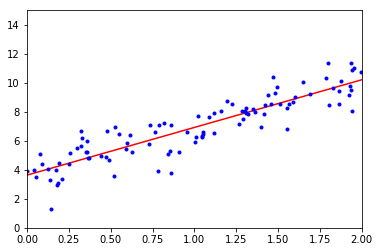

In [6]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### Performing Linear Regression with Sikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.63383302]), array([[3.28888111]]))

In [8]:
lin_reg.predict(x_new)

array([[ 3.63383302],
       [10.21159525]])

#### Gradient Descent Alg

In [9]:
eta = 0.5
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta-eta*gradients

theta

array([[-3.09133798e+73],
       [-3.67198612e+73]])

### Stochastic Gradient Descent

In [13]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) #rabdom initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta -eta * gradients

In [14]:
theta

array([[3.61931872],
       [3.25292209]])

### Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x)
x[0]

array([1.51106771])

In [16]:
x_poly[0]

array([1.51106771, 2.28332564])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.73229157]), array([[2.98586518, 0.15123514]]))

### Ploting Learning Curves

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")

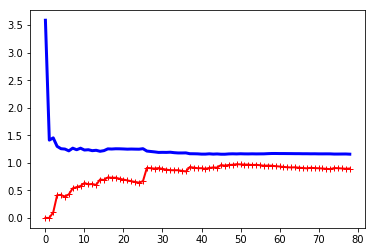

In [31]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)